In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 43.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [29]:
# Spanish corpus of 44 texts from ECHR (automatic translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-manual.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-12-18 00:32:06,601 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-12-18 00:32:06,602 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual.tsv
2023-12-18 00:32:06,603 Dev: None
2023-12-18 00:32:06,604 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1309,
        "number_of_documents_per_class": {
            "CODE": 75,
            "LOC": 361,
            "NATIONALITY": 85,
            "PER": 141,
            "DATE": 633,
            "ORG": 93,
            "TIME": 4,
            "LEGAL_PROFESSIONAL": 138,
            "QUANTITY": 163,
            "CURRENCY": 19,
            "ETHNIC_CATEGORY": 14
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 35936,
            "min": 1,
            "max": 556,
            "avg": 27.45301757066463
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 

In [30]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2023-12-18 00:34:06,317 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [31]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-12-18 00:34:06,959 Computing label dictionary. Progress:


1309it [00:00, 30857.80it/s]

2023-12-18 00:34:07,008 Dictionary created for label 'ner' with 12 values: DATE (seen 633 times), LOC (seen 361 times), QUANTITY (seen 163 times), PER (seen 141 times), LEGAL_PROFESSIONAL (seen 138 times), ORG (seen 93 times), NATIONALITY (seen 85 times), CODE (seen 75 times), CURRENCY (seen 19 times), ETHNIC_CATEGORY (seen 14 times), TIME (seen 4 times)
[b'<unk>', b'DATE', b'LOC', b'QUANTITY', b'PER', b'LEGAL_PROFESSIONAL', b'ORG', b'NATIONALITY', b'CODE', b'CURRENCY', b'ETHNIC_CATEGORY', b'TIME']


In [32]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [33]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-12-18 00:34:07,023 SequenceTagger predicts: Dictionary with 45 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME


In [34]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [35]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=19,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-12-18 00:34:07,696 ----------------------------------------------------------------------------------------------------
2023-12-18 00:34:07,697 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

2023-12-18 00:34:31,763 Evaluating as a multi-label problem: False
2023-12-18 00:34:31,781 DEV : loss 0.4870133101940155 - f1-score (micro avg)  0.1916
2023-12-18 00:34:31,800 BAD EPOCHS (no improvement): 0
2023-12-18 00:34:31,804 saving best model


2023-12-18 00:34:37,626 ----------------------------------------------------------------------------------------------------
2023-12-18 00:34:38,425 epoch 2 - iter 4/41 - loss 0.46546936 - time (sec): 0.80 - samples/sec: 4346.65 - lr: 0.100000
2023-12-18 00:34:42,566 epoch 2 - iter 8/41 - loss 0.54005196 - time (sec): 4.94 - samples/sec: 1510.42 - lr: 0.100000
2023-12-18 00:34:43,817 epoch 2 - iter 12/41 - loss 0.50817980 - time (sec): 6.19 - samples/sec: 1771.79 - lr: 0.100000
2023-12-18 00:34:45,146 epoch 2 - iter 16/41 - loss 0.47567091 - time (sec): 7.52 - samples/sec: 1929.24 - lr: 0.100000
2023-12-18 00:34:46,500 epoch 2 - iter 20/41 - loss 0.47008380 - time (sec): 8.87 - samples/sec: 2016.71 - lr: 0.100000
2023-12-18 00:34:47,889 epoch 2 - iter 24/41 - loss 0.45749523 - time (sec): 10.26 - samples/sec: 2072.06 - lr: 0.100000
2023-12-18 00:34:49,289 epoch 2 - iter 28/41 - loss 0.43695321 - time (sec): 11.66 - samples/sec: 2120.45 - lr: 0.100000
2023-12-18 00:34:50,689 epoch 2 - i

100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

2023-12-18 00:34:55,653 Evaluating as a multi-label problem: False
2023-12-18 00:34:55,666 DEV : loss 0.29142552614212036 - f1-score (micro avg)  0.5
2023-12-18 00:34:55,686 BAD EPOCHS (no improvement): 0
2023-12-18 00:34:55,689 saving best model


2023-12-18 00:35:01,548 ----------------------------------------------------------------------------------------------------
2023-12-18 00:35:02,373 epoch 3 - iter 4/41 - loss 0.30821129 - time (sec): 0.82 - samples/sec: 4607.86 - lr: 0.100000
2023-12-18 00:35:05,416 epoch 3 - iter 8/41 - loss 0.29981100 - time (sec): 3.87 - samples/sec: 1779.43 - lr: 0.100000
2023-12-18 00:35:07,600 epoch 3 - iter 12/41 - loss 0.37149766 - time (sec): 6.05 - samples/sec: 1795.55 - lr: 0.100000
2023-12-18 00:35:08,947 epoch 3 - iter 16/41 - loss 0.35746697 - time (sec): 7.40 - samples/sec: 1934.84 - lr: 0.100000
2023-12-18 00:35:10,292 epoch 3 - iter 20/41 - loss 0.33995489 - time (sec): 8.74 - samples/sec: 2023.72 - lr: 0.100000
2023-12-18 00:35:11,792 epoch 3 - iter 24/41 - loss 0.32267929 - time (sec): 10.24 - samples/sec: 2065.65 - lr: 0.100000
2023-12-18 00:35:13,358 epoch 3 - iter 28/41 - loss 0.31458216 - time (sec): 11.81 - samples/sec: 2101.52 - lr: 0.100000
2023-12-18 00:35:15,277 epoch 3 - i

100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

2023-12-18 00:35:20,015 Evaluating as a multi-label problem: False
2023-12-18 00:35:20,032 DEV : loss 0.24984264373779297 - f1-score (micro avg)  0.5526


2023-12-18 00:35:20,054 BAD EPOCHS (no improvement): 0
2023-12-18 00:35:20,057 saving best model
2023-12-18 00:35:25,936 ----------------------------------------------------------------------------------------------------
2023-12-18 00:35:26,870 epoch 4 - iter 4/41 - loss 0.27664882 - time (sec): 0.93 - samples/sec: 4098.34 - lr: 0.100000
2023-12-18 00:35:29,525 epoch 4 - iter 8/41 - loss 0.24552057 - time (sec): 3.59 - samples/sec: 2044.52 - lr: 0.100000
2023-12-18 00:35:30,838 epoch 4 - iter 12/41 - loss 0.21906186 - time (sec): 4.90 - samples/sec: 2169.92 - lr: 0.100000
2023-12-18 00:35:32,254 epoch 4 - iter 16/41 - loss 0.22151308 - time (sec): 6.32 - samples/sec: 2228.71 - lr: 0.100000
2023-12-18 00:35:34,420 epoch 4 - iter 20/41 - loss 0.24986622 - time (sec): 8.48 - samples/sec: 2106.26 - lr: 0.100000
2023-12-18 00:35:35,869 epoch 4 - iter 24/41 - loss 0.25029823 - time (sec): 9.93 - samples/sec: 2136.90 - lr: 0.100000
2023-12-18 00:35:37,330 epoch 4 - iter 28/41 - loss 0.239607

100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

2023-12-18 00:35:43,829 Evaluating as a multi-label problem: False
2023-12-18 00:35:43,841 DEV : loss 0.20703424513339996 - f1-score (micro avg)  0.5563


2023-12-18 00:35:43,862 BAD EPOCHS (no improvement): 0
2023-12-18 00:35:43,866 saving best model
2023-12-18 00:35:50,137 ----------------------------------------------------------------------------------------------------
2023-12-18 00:35:50,983 epoch 5 - iter 4/41 - loss 0.20755361 - time (sec): 0.84 - samples/sec: 3939.66 - lr: 0.100000
2023-12-18 00:35:53,386 epoch 5 - iter 8/41 - loss 0.19604895 - time (sec): 3.25 - samples/sec: 1976.94 - lr: 0.100000
2023-12-18 00:35:54,776 epoch 5 - iter 12/41 - loss 0.18351217 - time (sec): 4.64 - samples/sec: 2154.01 - lr: 0.100000
2023-12-18 00:35:56,191 epoch 5 - iter 16/41 - loss 0.18166245 - time (sec): 6.05 - samples/sec: 2258.16 - lr: 0.100000
2023-12-18 00:35:57,463 epoch 5 - iter 20/41 - loss 0.18716260 - time (sec): 7.32 - samples/sec: 2312.25 - lr: 0.100000
2023-12-18 00:35:58,715 epoch 5 - iter 24/41 - loss 0.18155120 - time (sec): 8.58 - samples/sec: 2328.28 - lr: 0.100000
2023-12-18 00:36:00,172 epoch 5 - iter 28/41 - loss 0.182323

100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

2023-12-18 00:36:07,443 Evaluating as a multi-label problem: False
2023-12-18 00:36:07,456 DEV : loss 0.1370854526758194 - f1-score (micro avg)  0.7087
2023-12-18 00:36:07,475 BAD EPOCHS (no improvement): 0
2023-12-18 00:36:07,479 saving best model


2023-12-18 00:36:12,996 ----------------------------------------------------------------------------------------------------
2023-12-18 00:36:13,807 epoch 6 - iter 4/41 - loss 0.16683360 - time (sec): 0.81 - samples/sec: 4431.13 - lr: 0.100000
2023-12-18 00:36:16,986 epoch 6 - iter 8/41 - loss 0.14184446 - time (sec): 3.99 - samples/sec: 1730.07 - lr: 0.100000
2023-12-18 00:36:18,443 epoch 6 - iter 12/41 - loss 0.13793745 - time (sec): 5.45 - samples/sec: 1943.20 - lr: 0.100000
2023-12-18 00:36:19,973 epoch 6 - iter 16/41 - loss 0.14228805 - time (sec): 6.97 - samples/sec: 2054.48 - lr: 0.100000
2023-12-18 00:36:21,483 epoch 6 - iter 20/41 - loss 0.14141243 - time (sec): 8.49 - samples/sec: 2135.59 - lr: 0.100000
2023-12-18 00:36:22,824 epoch 6 - iter 24/41 - loss 0.14177162 - time (sec): 9.83 - samples/sec: 2185.64 - lr: 0.100000
2023-12-18 00:36:24,320 epoch 6 - iter 28/41 - loss 0.14033014 - time (sec): 11.32 - samples/sec: 2196.38 - lr: 0.100000
2023-12-18 00:36:25,574 epoch 6 - it

100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

2023-12-18 00:36:31,611 Evaluating as a multi-label problem: False
2023-12-18 00:36:31,624 DEV : loss 0.12554992735385895 - f1-score (micro avg)  0.7421


2023-12-18 00:36:31,645 BAD EPOCHS (no improvement): 0
2023-12-18 00:36:31,648 saving best model
2023-12-18 00:36:37,933 ----------------------------------------------------------------------------------------------------
2023-12-18 00:36:39,205 epoch 7 - iter 4/41 - loss 0.15356715 - time (sec): 1.27 - samples/sec: 2707.33 - lr: 0.100000
2023-12-18 00:36:41,056 epoch 7 - iter 8/41 - loss 0.13817895 - time (sec): 3.12 - samples/sec: 2189.17 - lr: 0.100000
2023-12-18 00:36:42,646 epoch 7 - iter 12/41 - loss 0.13458810 - time (sec): 4.71 - samples/sec: 2234.96 - lr: 0.100000
2023-12-18 00:36:44,193 epoch 7 - iter 16/41 - loss 0.13766135 - time (sec): 6.26 - samples/sec: 2240.01 - lr: 0.100000
2023-12-18 00:36:46,931 epoch 7 - iter 20/41 - loss 0.15958726 - time (sec): 9.00 - samples/sec: 1997.43 - lr: 0.100000
2023-12-18 00:36:48,413 epoch 7 - iter 24/41 - loss 0.15339813 - time (sec): 10.48 - samples/sec: 2057.77 - lr: 0.100000
2023-12-18 00:36:49,825 epoch 7 - iter 28/41 - loss 0.14539

100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

2023-12-18 00:36:56,326 Evaluating as a multi-label problem: False
2023-12-18 00:36:56,343 DEV : loss 0.1531532108783722 - f1-score (micro avg)  0.7247


2023-12-18 00:36:56,365 BAD EPOCHS (no improvement): 1
2023-12-18 00:36:56,369 ----------------------------------------------------------------------------------------------------
2023-12-18 00:36:57,169 epoch 8 - iter 4/41 - loss 0.13924448 - time (sec): 0.80 - samples/sec: 4118.74 - lr: 0.100000
2023-12-18 00:36:58,544 epoch 8 - iter 8/41 - loss 0.13178022 - time (sec): 2.17 - samples/sec: 3112.57 - lr: 0.100000
2023-12-18 00:37:00,072 epoch 8 - iter 12/41 - loss 0.12992014 - time (sec): 3.70 - samples/sec: 2813.26 - lr: 0.100000
2023-12-18 00:37:01,591 epoch 8 - iter 16/41 - loss 0.12528759 - time (sec): 5.22 - samples/sec: 2672.64 - lr: 0.100000
2023-12-18 00:37:03,917 epoch 8 - iter 20/41 - loss 0.15346852 - time (sec): 7.55 - samples/sec: 2378.88 - lr: 0.100000
2023-12-18 00:37:05,371 epoch 8 - iter 24/41 - loss 0.14324526 - time (sec): 9.00 - samples/sec: 2380.20 - lr: 0.100000
2023-12-18 00:37:06,885 epoch 8 - iter 28/41 - loss 0.14115692 - time (sec): 10.51 - samples/sec: 2373

100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

2023-12-18 00:37:13,446 Evaluating as a multi-label problem: False
2023-12-18 00:37:13,459 DEV : loss 0.11560145765542984 - f1-score (micro avg)  0.8212


2023-12-18 00:37:13,479 BAD EPOCHS (no improvement): 0
2023-12-18 00:37:13,483 saving best model
2023-12-18 00:37:19,540 ----------------------------------------------------------------------------------------------------
2023-12-18 00:37:21,290 epoch 9 - iter 4/41 - loss 0.19203157 - time (sec): 1.75 - samples/sec: 2248.52 - lr: 0.100000
2023-12-18 00:37:23,115 epoch 9 - iter 8/41 - loss 0.15647789 - time (sec): 3.57 - samples/sec: 2068.29 - lr: 0.100000
2023-12-18 00:37:24,570 epoch 9 - iter 12/41 - loss 0.14263010 - time (sec): 5.03 - samples/sec: 2165.56 - lr: 0.100000
2023-12-18 00:37:25,860 epoch 9 - iter 16/41 - loss 0.12976865 - time (sec): 6.32 - samples/sec: 2229.88 - lr: 0.100000
2023-12-18 00:37:27,194 epoch 9 - iter 20/41 - loss 0.12167471 - time (sec): 7.65 - samples/sec: 2282.58 - lr: 0.100000
2023-12-18 00:37:28,566 epoch 9 - iter 24/41 - loss 0.11903702 - time (sec): 9.02 - samples/sec: 2284.42 - lr: 0.100000
2023-12-18 00:37:30,067 epoch 9 - iter 28/41 - loss 0.120536

100%|██████████| 5/5 [00:01<00:00,  3.96it/s]


2023-12-18 00:37:36,717 Evaluating as a multi-label problem: False
2023-12-18 00:37:36,732 DEV : loss 0.08255567401647568 - f1-score (micro avg)  0.8117
2023-12-18 00:37:36,755 BAD EPOCHS (no improvement): 1
2023-12-18 00:37:36,759 ----------------------------------------------------------------------------------------------------
2023-12-18 00:37:37,494 epoch 10 - iter 4/41 - loss 0.08922625 - time (sec): 0.73 - samples/sec: 4284.78 - lr: 0.100000
2023-12-18 00:37:38,868 epoch 10 - iter 8/41 - loss 0.09465135 - time (sec): 2.11 - samples/sec: 3061.20 - lr: 0.100000
2023-12-18 00:37:40,334 epoch 10 - iter 12/41 - loss 0.09021650 - time (sec): 3.57 - samples/sec: 2879.92 - lr: 0.100000
2023-12-18 00:37:41,869 epoch 10 - iter 16/41 - loss 0.08824682 - time (sec): 5.11 - samples/sec: 2708.34 - lr: 0.100000
2023-12-18 00:37:43,265 epoch 10 - iter 20/41 - loss 0.09303666 - time (sec): 6.50 - samples/sec: 2675.17 - lr: 0.100000
2023-12-18 00:37:44,737 epoch 10 - iter 24/41 - loss 0.09056990 

100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

2023-12-18 00:37:53,780 Evaluating as a multi-label problem: False
2023-12-18 00:37:53,794 DEV : loss 0.09747276455163956 - f1-score (micro avg)  0.7947


2023-12-18 00:37:53,817 BAD EPOCHS (no improvement): 2
2023-12-18 00:37:53,822 ----------------------------------------------------------------------------------------------------
2023-12-18 00:37:54,574 epoch 11 - iter 4/41 - loss 0.09981489 - time (sec): 0.75 - samples/sec: 4389.84 - lr: 0.100000
2023-12-18 00:37:56,040 epoch 11 - iter 8/41 - loss 0.09069306 - time (sec): 2.22 - samples/sec: 3111.82 - lr: 0.100000
2023-12-18 00:37:57,532 epoch 11 - iter 12/41 - loss 0.08355132 - time (sec): 3.71 - samples/sec: 2901.89 - lr: 0.100000
2023-12-18 00:37:59,030 epoch 11 - iter 16/41 - loss 0.07796959 - time (sec): 5.21 - samples/sec: 2708.57 - lr: 0.100000
2023-12-18 00:38:00,504 epoch 11 - iter 20/41 - loss 0.08350420 - time (sec): 6.68 - samples/sec: 2631.78 - lr: 0.100000
2023-12-18 00:38:02,768 epoch 11 - iter 24/41 - loss 0.10422218 - time (sec): 8.94 - samples/sec: 2397.93 - lr: 0.100000
2023-12-18 00:38:04,073 epoch 11 - iter 28/41 - loss 0.10147870 - time (sec): 10.25 - samples/se

100%|██████████| 5/5 [00:01<00:00,  4.09it/s]

2023-12-18 00:38:10,261 Evaluating as a multi-label problem: False
2023-12-18 00:38:10,274 DEV : loss 0.09428192675113678 - f1-score (micro avg)  0.8516
2023-12-18 00:38:10,295 BAD EPOCHS (no improvement): 0


2023-12-18 00:38:10,299 saving best model
2023-12-18 00:38:16,501 ----------------------------------------------------------------------------------------------------
2023-12-18 00:38:17,244 epoch 12 - iter 4/41 - loss 0.07098375 - time (sec): 0.74 - samples/sec: 4729.06 - lr: 0.100000
2023-12-18 00:38:20,165 epoch 12 - iter 8/41 - loss 0.08656215 - time (sec): 3.66 - samples/sec: 1962.30 - lr: 0.100000
2023-12-18 00:38:22,428 epoch 12 - iter 12/41 - loss 0.11763603 - time (sec): 5.92 - samples/sec: 1882.62 - lr: 0.100000
2023-12-18 00:38:23,779 epoch 12 - iter 16/41 - loss 0.11004714 - time (sec): 7.28 - samples/sec: 1999.73 - lr: 0.100000
2023-12-18 00:38:25,233 epoch 12 - iter 20/41 - loss 0.09786389 - time (sec): 8.73 - samples/sec: 2090.24 - lr: 0.100000
2023-12-18 00:38:26,667 epoch 12 - iter 24/41 - loss 0.09687911 - time (sec): 10.16 - samples/sec: 2106.39 - lr: 0.100000
2023-12-18 00:38:28,193 epoch 12 - iter 28/41 - loss 0.09768111 - time (sec): 11.69 - samples/sec: 2150.33 -

100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

2023-12-18 00:38:34,609 Evaluating as a multi-label problem: False
2023-12-18 00:38:34,624 DEV : loss 0.07254502922296524 - f1-score (micro avg)  0.8435


2023-12-18 00:38:34,648 BAD EPOCHS (no improvement): 1
2023-12-18 00:38:34,652 ----------------------------------------------------------------------------------------------------
2023-12-18 00:38:35,645 epoch 13 - iter 4/41 - loss 0.11634545 - time (sec): 0.99 - samples/sec: 3750.70 - lr: 0.100000
2023-12-18 00:38:37,108 epoch 13 - iter 8/41 - loss 0.09090554 - time (sec): 2.45 - samples/sec: 2964.44 - lr: 0.100000
2023-12-18 00:38:38,576 epoch 13 - iter 12/41 - loss 0.08109030 - time (sec): 3.92 - samples/sec: 2796.39 - lr: 0.100000
2023-12-18 00:38:40,087 epoch 13 - iter 16/41 - loss 0.07736852 - time (sec): 5.43 - samples/sec: 2650.63 - lr: 0.100000
2023-12-18 00:38:41,526 epoch 13 - iter 20/41 - loss 0.07388764 - time (sec): 6.87 - samples/sec: 2582.20 - lr: 0.100000
2023-12-18 00:38:42,972 epoch 13 - iter 24/41 - loss 0.07304924 - time (sec): 8.32 - samples/sec: 2522.90 - lr: 0.100000
2023-12-18 00:38:44,458 epoch 13 - iter 28/41 - loss 0.07684836 - time (sec): 9.80 - samples/sec

100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

2023-12-18 00:38:51,918 Evaluating as a multi-label problem: False


2023-12-18 00:38:51,937 DEV : loss 0.06930666416883469 - f1-score (micro avg)  0.8647
2023-12-18 00:38:51,966 BAD EPOCHS (no improvement): 0
2023-12-18 00:38:51,970 saving best model
2023-12-18 00:38:58,236 ----------------------------------------------------------------------------------------------------
2023-12-18 00:38:58,983 epoch 14 - iter 4/41 - loss 0.09098375 - time (sec): 0.74 - samples/sec: 4499.57 - lr: 0.100000
2023-12-18 00:39:01,228 epoch 14 - iter 8/41 - loss 0.07964072 - time (sec): 2.99 - samples/sec: 2317.94 - lr: 0.100000
2023-12-18 00:39:02,673 epoch 14 - iter 12/41 - loss 0.08017409 - time (sec): 4.43 - samples/sec: 2342.95 - lr: 0.100000
2023-12-18 00:39:04,119 epoch 14 - iter 16/41 - loss 0.07469465 - time (sec): 5.88 - samples/sec: 2319.37 - lr: 0.100000
2023-12-18 00:39:05,741 epoch 14 - iter 20/41 - loss 0.07206694 - time (sec): 7.50 - samples/sec: 2321.70 - lr: 0.100000
2023-12-18 00:39:07,527 epoch 14 - iter 24/41 - loss 0.06942527 - time (sec): 9.29 - samp

100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

2023-12-18 00:39:17,011 Evaluating as a multi-label problem: False
2023-12-18 00:39:17,026 DEV : loss 0.07853973656892776 - f1-score (micro avg)  0.8556


2023-12-18 00:39:17,048 BAD EPOCHS (no improvement): 1
2023-12-18 00:39:17,052 ----------------------------------------------------------------------------------------------------
2023-12-18 00:39:17,890 epoch 15 - iter 4/41 - loss 0.07979574 - time (sec): 0.84 - samples/sec: 4086.57 - lr: 0.100000
2023-12-18 00:39:19,499 epoch 15 - iter 8/41 - loss 0.06991577 - time (sec): 2.44 - samples/sec: 2962.66 - lr: 0.100000
2023-12-18 00:39:20,965 epoch 15 - iter 12/41 - loss 0.06612328 - time (sec): 3.91 - samples/sec: 2773.08 - lr: 0.100000
2023-12-18 00:39:22,371 epoch 15 - iter 16/41 - loss 0.06111820 - time (sec): 5.32 - samples/sec: 2627.64 - lr: 0.100000
2023-12-18 00:39:24,858 epoch 15 - iter 20/41 - loss 0.08000498 - time (sec): 7.80 - samples/sec: 2284.89 - lr: 0.100000
2023-12-18 00:39:26,254 epoch 15 - iter 24/41 - loss 0.07986354 - time (sec): 9.20 - samples/sec: 2328.15 - lr: 0.100000
2023-12-18 00:39:27,669 epoch 15 - iter 28/41 - loss 0.07776759 - time (sec): 10.62 - samples/se

100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

2023-12-18 00:39:34,084 Evaluating as a multi-label problem: False
2023-12-18 00:39:34,097 DEV : loss 0.09415710717439651 - f1-score (micro avg)  0.8516
2023-12-18 00:39:34,116 BAD EPOCHS (no improvement): 2


2023-12-18 00:39:34,121 ----------------------------------------------------------------------------------------------------
2023-12-18 00:39:34,872 epoch 16 - iter 4/41 - loss 0.04948244 - time (sec): 0.75 - samples/sec: 4517.43 - lr: 0.100000
2023-12-18 00:39:36,228 epoch 16 - iter 8/41 - loss 0.05032664 - time (sec): 2.11 - samples/sec: 3050.99 - lr: 0.100000
2023-12-18 00:39:37,679 epoch 16 - iter 12/41 - loss 0.05465690 - time (sec): 3.56 - samples/sec: 2705.73 - lr: 0.100000
2023-12-18 00:39:39,202 epoch 16 - iter 16/41 - loss 0.05589582 - time (sec): 5.08 - samples/sec: 2562.07 - lr: 0.100000
2023-12-18 00:39:41,388 epoch 16 - iter 20/41 - loss 0.08256644 - time (sec): 7.27 - samples/sec: 2307.91 - lr: 0.100000
2023-12-18 00:39:42,835 epoch 16 - iter 24/41 - loss 0.07740717 - time (sec): 8.71 - samples/sec: 2337.05 - lr: 0.100000
2023-12-18 00:39:44,233 epoch 16 - iter 28/41 - loss 0.07580840 - time (sec): 10.11 - samples/sec: 2343.47 - lr: 0.100000
2023-12-18 00:39:45,720 epoch

100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

2023-12-18 00:39:50,436 Evaluating as a multi-label problem: False
2023-12-18 00:39:50,448 DEV : loss 0.06940597295761108 - f1-score (micro avg)  0.8595
2023-12-18 00:39:50,468 BAD EPOCHS (no improvement): 3


2023-12-18 00:39:50,472 ----------------------------------------------------------------------------------------------------
2023-12-18 00:39:51,310 epoch 17 - iter 4/41 - loss 0.07352459 - time (sec): 0.84 - samples/sec: 4432.29 - lr: 0.100000
2023-12-18 00:39:52,692 epoch 17 - iter 8/41 - loss 0.06488331 - time (sec): 2.22 - samples/sec: 3171.46 - lr: 0.100000
2023-12-18 00:39:54,880 epoch 17 - iter 12/41 - loss 0.08742713 - time (sec): 4.41 - samples/sec: 2508.01 - lr: 0.100000
2023-12-18 00:39:56,234 epoch 17 - iter 16/41 - loss 0.07623919 - time (sec): 5.76 - samples/sec: 2470.52 - lr: 0.100000
2023-12-18 00:39:57,550 epoch 17 - iter 20/41 - loss 0.07267015 - time (sec): 7.08 - samples/sec: 2436.76 - lr: 0.100000
2023-12-18 00:39:58,985 epoch 17 - iter 24/41 - loss 0.07011965 - time (sec): 8.51 - samples/sec: 2462.45 - lr: 0.100000
2023-12-18 00:40:00,392 epoch 17 - iter 28/41 - loss 0.06895485 - time (sec): 9.92 - samples/sec: 2464.02 - lr: 0.100000
2023-12-18 00:40:01,789 epoch 

100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

2023-12-18 00:40:07,000 Evaluating as a multi-label problem: False
2023-12-18 00:40:07,015 DEV : loss 0.0569305382668972 - f1-score (micro avg)  0.8859
2023-12-18 00:40:07,038 BAD EPOCHS (no improvement): 0
2023-12-18 00:40:07,042 saving best model


2023-12-18 00:40:12,641 ----------------------------------------------------------------------------------------------------
2023-12-18 00:40:14,247 epoch 18 - iter 4/41 - loss 0.10428192 - time (sec): 1.60 - samples/sec: 2548.92 - lr: 0.100000
2023-12-18 00:40:16,653 epoch 18 - iter 8/41 - loss 0.08977896 - time (sec): 4.01 - samples/sec: 1853.29 - lr: 0.100000
2023-12-18 00:40:17,935 epoch 18 - iter 12/41 - loss 0.07775119 - time (sec): 5.29 - samples/sec: 2096.72 - lr: 0.100000
2023-12-18 00:40:19,447 epoch 18 - iter 16/41 - loss 0.07278554 - time (sec): 6.80 - samples/sec: 2160.04 - lr: 0.100000
2023-12-18 00:40:20,891 epoch 18 - iter 20/41 - loss 0.06901279 - time (sec): 8.25 - samples/sec: 2178.28 - lr: 0.100000
2023-12-18 00:40:22,446 epoch 18 - iter 24/41 - loss 0.06452248 - time (sec): 9.80 - samples/sec: 2190.43 - lr: 0.100000
2023-12-18 00:40:23,926 epoch 18 - iter 28/41 - loss 0.06492368 - time (sec): 11.28 - samples/sec: 2206.60 - lr: 0.100000
2023-12-18 00:40:25,238 epoch

100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

2023-12-18 00:40:30,399 Evaluating as a multi-label problem: False
2023-12-18 00:40:30,413 DEV : loss 0.05919571965932846 - f1-score (micro avg)  0.8836
2023-12-18 00:40:30,433 BAD EPOCHS (no improvement): 1
2023-12-18 00:40:30,438 ----------------------------------------------------------------------------------------------------


2023-12-18 00:40:32,208 epoch 19 - iter 4/41 - loss 0.10707483 - time (sec): 1.77 - samples/sec: 2437.53 - lr: 0.100000
2023-12-18 00:40:33,754 epoch 19 - iter 8/41 - loss 0.08067130 - time (sec): 3.31 - samples/sec: 2289.32 - lr: 0.100000
2023-12-18 00:40:35,333 epoch 19 - iter 12/41 - loss 0.07314181 - time (sec): 4.89 - samples/sec: 2237.60 - lr: 0.100000
2023-12-18 00:40:36,941 epoch 19 - iter 16/41 - loss 0.06791666 - time (sec): 6.50 - samples/sec: 2241.62 - lr: 0.100000
2023-12-18 00:40:38,444 epoch 19 - iter 20/41 - loss 0.06132994 - time (sec): 8.00 - samples/sec: 2232.39 - lr: 0.100000
2023-12-18 00:40:39,980 epoch 19 - iter 24/41 - loss 0.05850177 - time (sec): 9.54 - samples/sec: 2237.40 - lr: 0.100000
2023-12-18 00:40:41,443 epoch 19 - iter 28/41 - loss 0.05842060 - time (sec): 11.00 - samples/sec: 2256.21 - lr: 0.100000
2023-12-18 00:40:42,801 epoch 19 - iter 32/41 - loss 0.05772204 - time (sec): 12.36 - samples/sec: 2272.77 - lr: 0.100000
2023-12-18 00:40:44,181 epoch 19

100%|██████████| 5/5 [00:01<00:00,  4.06it/s]

2023-12-18 00:40:47,795 Evaluating as a multi-label problem: False
2023-12-18 00:40:47,810 DEV : loss 0.06576850265264511 - f1-score (micro avg)  0.867


2023-12-18 00:40:47,833 BAD EPOCHS (no improvement): 2
2023-12-18 00:40:53,382 ----------------------------------------------------------------------------------------------------
2023-12-18 00:40:58,767 SequenceTagger predicts: Dictionary with 47 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-PER, B-PER, E-PER, I-PER, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, <START>, <STOP>


100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

2023-12-18 00:41:00,915 Evaluating as a multi-label problem: False
2023-12-18 00:41:00,930 0.8876	0.845	0.8658	0.7736
2023-12-18 00:41:00,932 
Results:
- F-score (micro) 0.8658
- F-score (macro) 0.6827
- Accuracy 0.7736

By class:
                    precision    recall  f1-score   support

              DATE     0.9444    0.9551    0.9497        89
               LOC     0.9130    0.8077    0.8571        52
               PER     0.9655    0.8750    0.9180        32
          QUANTITY     0.8846    0.8519    0.8679        27
               ORG     0.7778    0.7000    0.7368        20
LEGAL_PROFESSIONAL     0.7647    0.9286    0.8387        14
          CURRENCY     0.5385    0.5385    0.5385        13
       NATIONALITY     1.0000    0.7857    0.8800        14
              CODE     1.0000    0.8571    0.9231         7
              TIME     0.0000    0.0000    0.0000         1
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         2

         micro avg     0.8876    0.8450    0.86

{'test_score': 0.8657844990548204,
 'dev_score_history': [0.19157088122605365,
  0.5,
  0.5526315789473685,
  0.55625,
  0.7086614173228347,
  0.7421052631578947,
  0.7247191011235956,
  0.8212290502793296,
  0.8116710875331564,
  0.7947368421052631,
  0.8516483516483516,
  0.8435013262599468,
  0.8647214854111406,
  0.8556149732620321,
  0.8516483516483516,
  0.8594594594594593,
  0.8859416445623343,
  0.8835978835978837,
  0.8670212765957447],
 'train_loss_history': [0.8755171411502393,
  0.40497967523861866,
  0.289381073079572,
  0.23246358869761521,
  0.18890410751927036,
  0.16978468177367403,
  0.14094785314952277,
  0.13388443332852154,
  0.11501201517541602,
  0.1017077506278523,
  0.09959633097729297,
  0.09018364190418382,
  0.08684198068701998,
  0.07465370021966135,
  0.07390883217299504,
  0.06945519519510379,
  0.060981621406806547,
  0.06036428585714882,
  0.05635224339798531],
 'dev_loss_history': [0.4870133101940155,
  0.29142552614212036,
  0.24984264373779297,
  0.2

2023-12-18 00:41:00,952 ----------------------------------------------------------------------------------------------------
2023-12-18 00:41:00,953 WARNING: No LOSS found for test split in this data.
2023-12-18 00:41:00,955 Are you sure you want to plot LOSS and not another value?
2023-12-18 00:41:00,955 ----------------------------------------------------------------------------------------------------
2023-12-18 00:41:00,981 ----------------------------------------------------------------------------------------------------
2023-12-18 00:41:00,983 WARNING: No F1 found for test split in this data.
2023-12-18 00:41:00,984 Are you sure you want to plot F1 and not another value?
2023-12-18 00:41:00,985 ----------------------------------------------------------------------------------------------------
2023-12-18 00:41:02,007 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/Flair-manual-model-ES-all/training.png


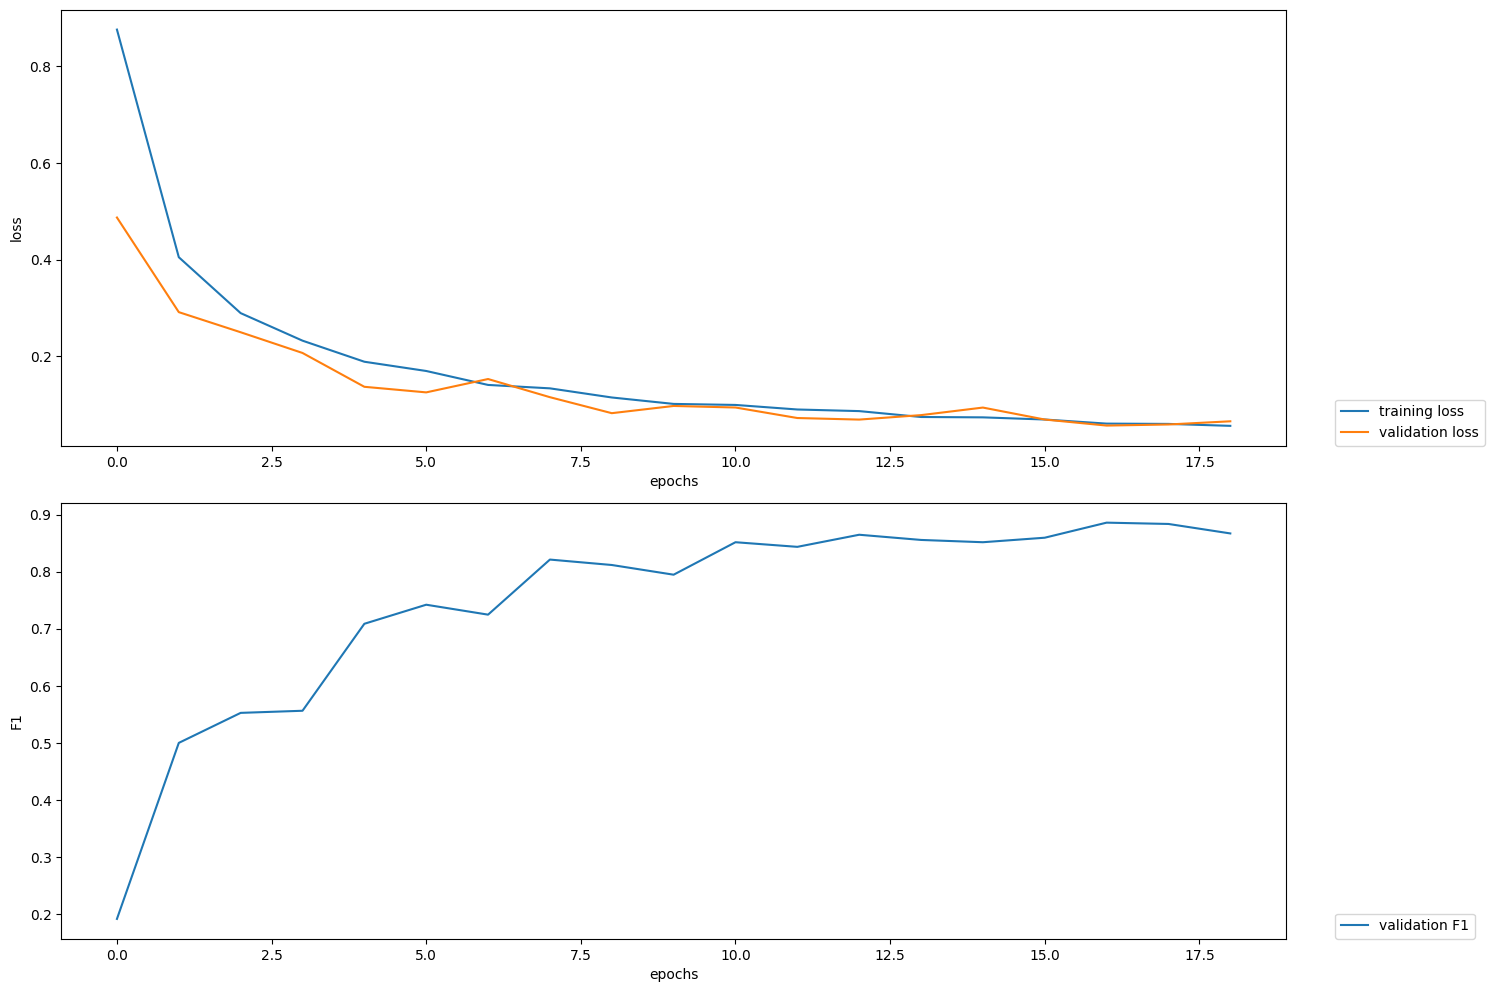

2023-12-18 00:41:05,684 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/Flair-manual-model-ES-all/weights.png


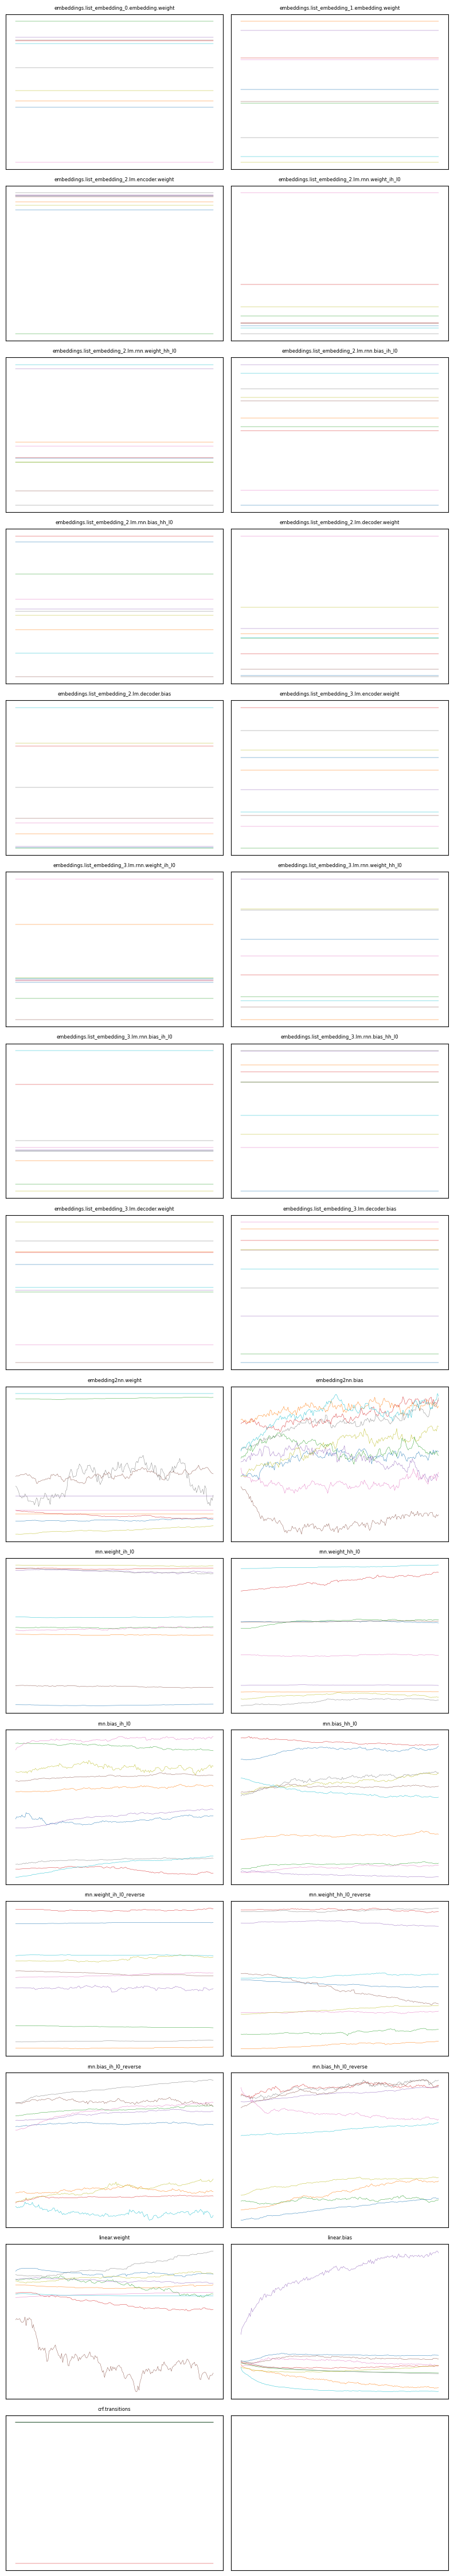

In [36]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')